# Desafio Oficina de aprendizado de máquinas da comunidade AI Girls

## Grupo C

### Integrantes : 
Ana Maria Bender, Klara Narumi Maia e Larissa Rocha

# Bibliotecas

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from graphviz import render 

# Banco de dados

#### Link do banco de dados: https://www.kaggle.com/dipam7/student-grade-prediction

In [2]:
pd.set_option('display.max_columns', None)
df_modelo = pd.read_csv('df_modelo.csv')
df_modelo.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


# Modelo arvore de decisão

## Definição das variáveis X e  y (resposta) 

In [3]:
# define as caracteristicas para treinar o modelo

# remove a variável resposta
X = df_modelo.drop('G3', axis=1)
# define a variável resposta
y = df_modelo['G3']

print(X.shape)
print(y.shape)

(395, 32)
(395,)


### Separando as variáveis em categorias

In [4]:
X_social = df_modelo[['activities','freetime','reason','romantic','goout','Dalc','Walc','G1','G2']]
# Foram escolhidas 9 variáveis para o X
print(X_social.shape)

X_family = df_modelo[['famsize','Pstatus','Medu','Fedu','Mjob','Fjob','guardian','famsup','nursery','famrel','G1','G2']]
# Foram escolhidas 12 variáveis para o X
print(X_family.shape)

X_demog = df_modelo[['school','sex','age','address','traveltime','studytime','internet','failures','absences','schoolsup','paid','health','higher','G1','G2']]
# Foram escolhidas 15 variáveis para o X
print(X_demog.shape)

(395, 9)
(395, 12)
(395, 15)


### Usando a Matriz de correlação - coeficiente de Pearson

In [5]:
# Acima de 0.5 ou abaixo de -0.5
X_correlacao_pearson_cinco = df_modelo[['G1','G2']]
# Foram escolhidas 2 variáveis para o X
print(X_correlacao_pearson_cinco.shape)

# Acima de 0.13 ou abaixo de -0.13
X_correlacao_pearson_treze = df_modelo[['age', 'Medu','Fedu','failures','higher','romantic','goout','G1','G2']]
# Foram escolhidas 9 variáveis para o X
print(X_correlacao_pearson_treze.shape)

(395, 2)
(395, 9)


### Usando a Matriz de correlação - Spearman

In [6]:
# Acima de 0.13 ou abaixo de -0.13
X_correlacao_spearman_treze = df_modelo[['age', 'Medu','Fedu','failures','schoolsup','higher','goout','G1','G2']]
# Foram escolhidas 9 variáveis para o X
print(X_correlacao_spearman_treze.shape)

(395, 9)


### Usando o RFECV

In [7]:
# foram selecionadas 10 características utilizando eliminação recursiva de características com validação cruzada (RFE-CV)
X_RFECV = df_modelo[['reason','freetime','goout','Walc','Fedu','Mjob','health','age','absences','G1','G2']]
print(X_RFECV.shape)

(395, 11)


## Criação do modelo

In [8]:
#cria uma função para treinar, testar e avaliar o modelo em uma unica chamada (contem grafico da árvore e grafico de importancia das características) <3
def arvore_test(X,y,max_depth):

## Define o tamanho do treino e teste (0.7, 0.3)
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
    X_test.shape
    
# Foi escolhido o modelo de Arvore de Decisao
    regr_1 = DecisionTreeRegressor(max_depth=max_depth)
    regr_1.fit(X_train, y_train)

# Predict
    y_pred = regr_1.predict(X_test)

# export the decision tree to a tree.dot file # for visualizing the plot easily anywhere #só ta salvando um pq sempre salva com o mesmo nome...
    export_graphviz(regr_1, out_file ='tree.dot')  
    render('dot', 'png', 'tree.dot')

# grafico de arvore
    plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
    tree.plot_tree(regr_1, fontsize=8)
    plt.show()

## Feature importance

    importance = regr_1.feature_importances_

# summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

    features_n = X.columns
    features_n

# gráfico da importancia de cada uma das variaveis
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.xticks([x for x in range(len(importance))], features_n, rotation='vertical')
    pyplot.show()
         
## Metricas de avaliacao do modelo
   
    print('r2 score: y_test and y_predito')  
    print(r2_score(y_test, y_pred))
        
    print('mean absolute error y_test e y_predito')
    print(mean_absolute_error(y_test, y_pred))
    
    print('mean squared error y_test e y_predito')
    print(mean_squared_error(y_test, y_pred))

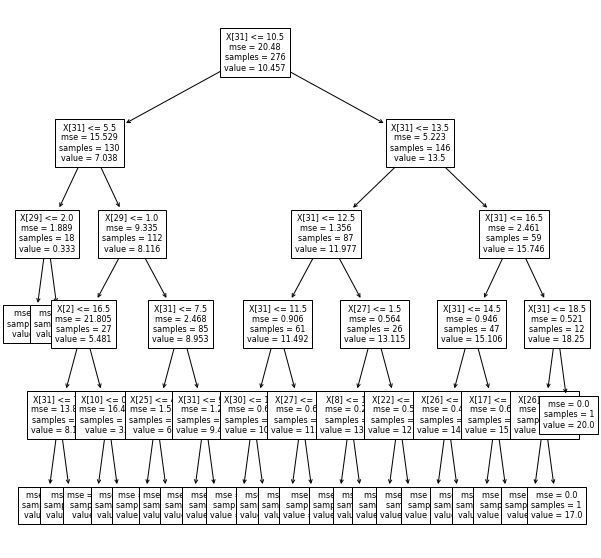

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.03321
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00035
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.02337
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00076
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00062
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00184
Feature: 26, Score: 0.00050
Feature: 27, Score: 0.00167
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.05212
Feature: 30, Score: 0.00087
Feature: 31, Score: 0.88468


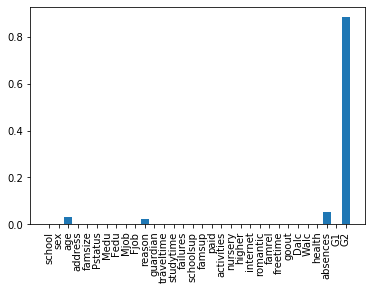

r2 score: y_test and y_predito
0.8599241810850109
mean absolute error y_test e y_predito
1.0224241516023325
mean squared error y_test e y_predito
3.079155534101343


In [9]:
arvore_test(X,y,5)

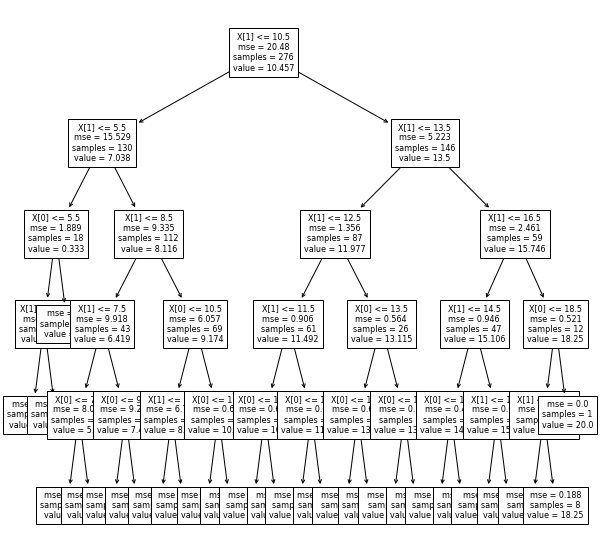

Feature: 0, Score: 0.01828
Feature: 1, Score: 0.98172


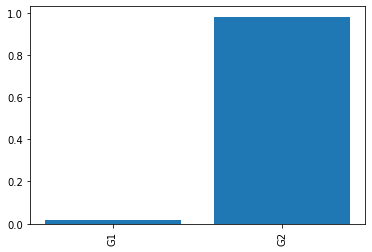

r2 score: y_test and y_predito
0.7310845606478971
mean absolute error y_test e y_predito
1.4690257592135993
mean squared error y_test e y_predito
5.911316240734228


In [10]:
arvore_test(X_correlacao_pearson_cinco, y, 5)

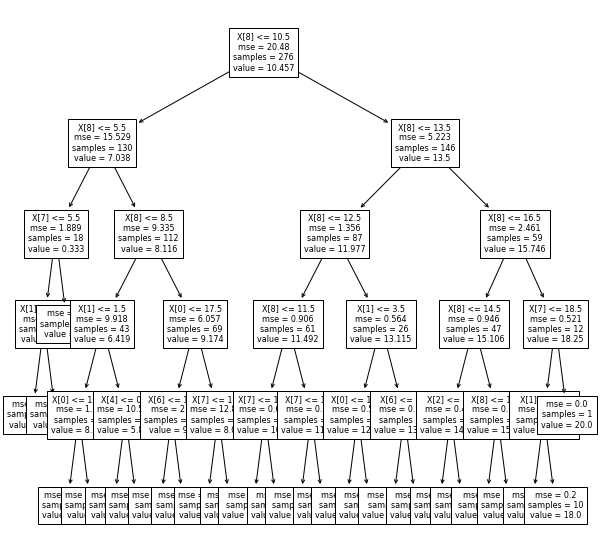

Feature: 0, Score: 0.00884
Feature: 1, Score: 0.01585
Feature: 2, Score: 0.00019
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01352
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00559
Feature: 7, Score: 0.01324
Feature: 8, Score: 0.94276


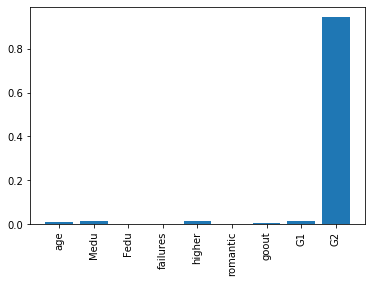

r2 score: y_test and y_predito
0.6313037560635608
mean absolute error y_test e y_predito
1.7549128742406053
mean squared error y_test e y_predito
8.10470421456721


In [11]:
arvore_test(X_correlacao_pearson_treze, y, 5)

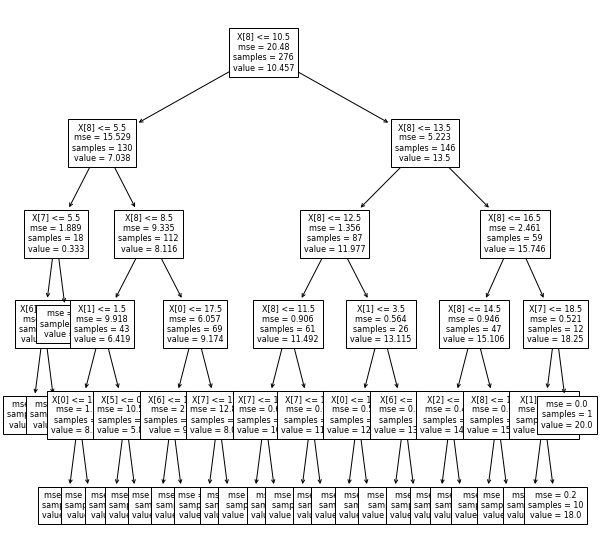

Feature: 0, Score: 0.00884
Feature: 1, Score: 0.01103
Feature: 2, Score: 0.00019
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01352
Feature: 6, Score: 0.01042
Feature: 7, Score: 0.01324
Feature: 8, Score: 0.94276


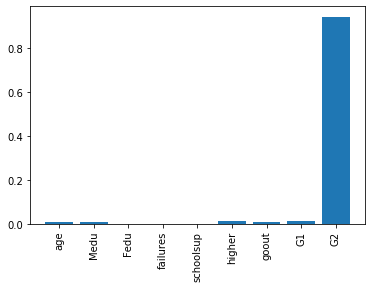

r2 score: y_test and y_predito
0.6358911478036857
mean absolute error y_test e y_predito
1.7381061515515297
mean squared error y_test e y_predito
8.003863878432757


In [12]:
arvore_test(X_correlacao_spearman_treze, y, 5)

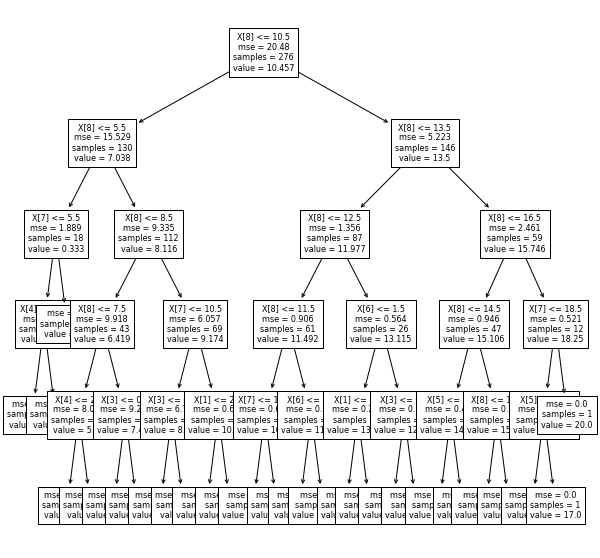

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00086
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.01234
Feature: 4, Score: 0.01583
Feature: 5, Score: 0.00055
Feature: 6, Score: 0.00182
Feature: 7, Score: 0.00800
Feature: 8, Score: 0.96060


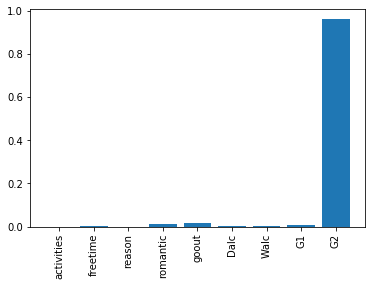

r2 score: y_test and y_predito
0.6863228762576992
mean absolute error y_test e y_predito
1.573423984978607
mean squared error y_test e y_predito
6.895270425499142


In [13]:
arvore_test(X_social,y,5)

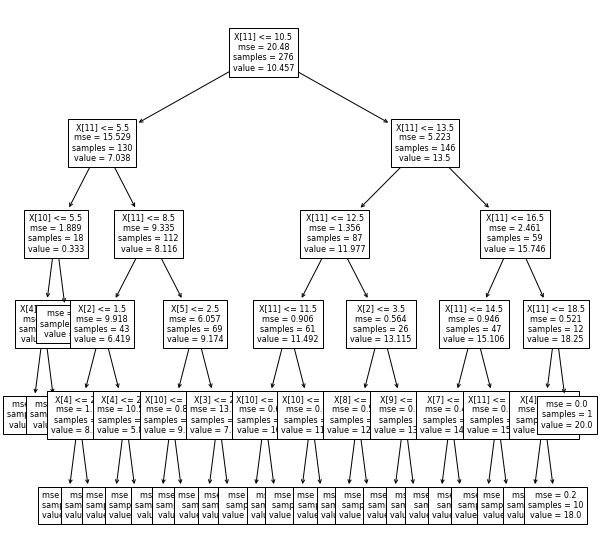

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01081
Feature: 3, Score: 0.00837
Feature: 4, Score: 0.01712
Feature: 5, Score: 0.01716
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00020
Feature: 8, Score: 0.00020
Feature: 9, Score: 0.00010
Feature: 10, Score: 0.00548
Feature: 11, Score: 0.94055


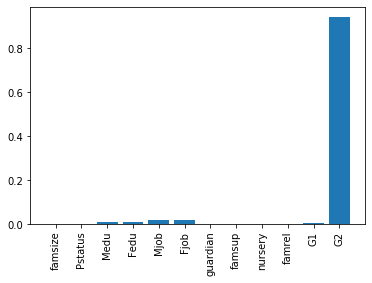

r2 score: y_test and y_predito
0.6320726690962687
mean absolute error y_test e y_predito
1.8004540394246278
mean squared error y_test e y_predito
8.087801919522683


In [14]:
arvore_test(X_family,y,5)

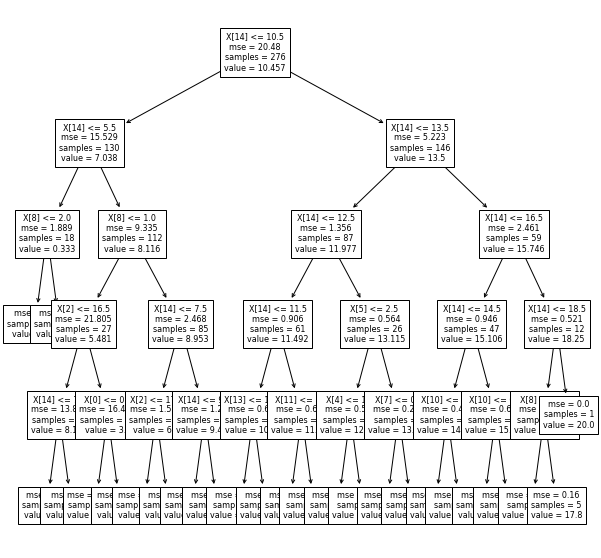

Feature: 0, Score: 0.01325
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.03499
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00029
Feature: 5, Score: 0.00037
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00017
Feature: 8, Score: 0.05288
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00094
Feature: 11, Score: 0.00099
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00088
Feature: 14, Score: 0.89522


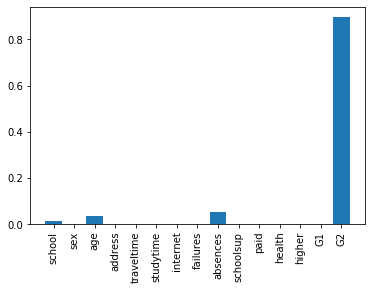

r2 score: y_test and y_predito
0.8464616412495521
mean absolute error y_test e y_predito
1.0786281891614122
mean squared error y_test e y_predito
3.3750899384725246


In [15]:
arvore_test(X_demog,y,5)

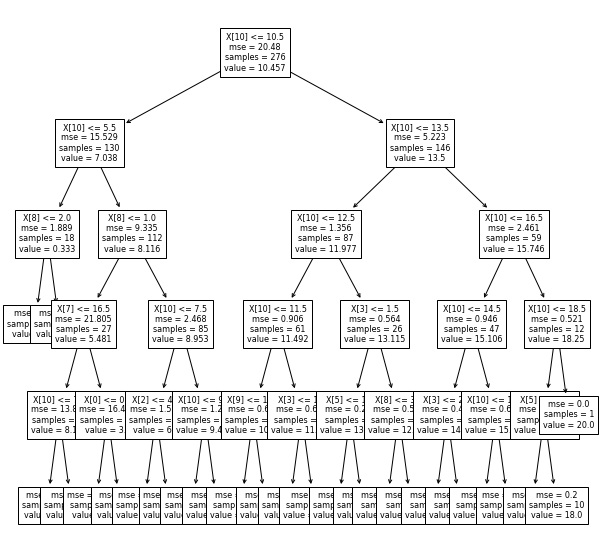

Feature: 0, Score: 0.02338
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00184
Feature: 3, Score: 0.00186
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00052
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.03323
Feature: 8, Score: 0.05251
Feature: 9, Score: 0.00087
Feature: 10, Score: 0.88579


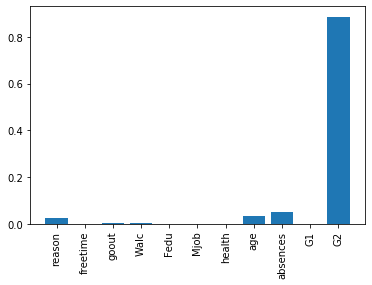

r2 score: y_test and y_predito
0.8616711175719572
mean absolute error y_test e y_predito
1.0010716012581855
mean squared error y_test e y_predito
3.0407542654657567


In [16]:
arvore_test(X_RFECV,y,5)

# Avaliação do modelo

## Métricas de avaliação do modelo de regressão

Existem algumas estatísticas que podemos usar para avaliar se o nosso modelo fez um bom trabalho na previsão das notas finais, as mais comuns para modelos de regressão, e que usamos nesse projeto são:
- Erro Médio Absoluto / Mean Absolute Error (MAE):
Aqui é calculado o resíduo, ou seja, a diferença absoluta entre o valor predito e o valor real de cada ponto, e depois é tirada uma média desses valores. O MAE descreve a magnitude típica dos resíduos, é uma métrica bastante intuitiva e quanto maior seu valor, mais o nosso modelo está "errando".
- Erro Quadrado Médio / Mean Square Error (MSE):
É parecido com o MAE, porém eleva ao quadrado a diferença entre o valor predito e o verdadeiro, então aqui  diferenças menores têm menos importância, enquanto diferenças maiores recebem mais peso.
- R^2:
Também conhecido como coeficiente de determinação, ele fornece uma indicação da qualidade do ajuste e, portanto, uma medida de quão bem as amostras não vistas podem ser previstas pelo modelo, por meio da proporção da variância explicada. O melhor score possível é 1.

## Conclusões

* Notamos que os melhores resultados, foram utilizando as features do RFECV, com todas as features da base de dados (X) e utilizando os dados demográficos (X_demog);

* Para elevar o R^2 do modelo utilizando o X_RFECV, tivemos que adicionar a característica G2, assim ele pode superar as métricas do modelo quando utilizando todas as características;

* A seleção de características utilizando correlação, independente do método, não apresentaram melhora no desempenho do modelo;

* Já o X_family, o X_social e o X_correlacao apesar de apresentarem MAE baixo, apresentam MSE alto. É esperado que o MSE seja maior do que o MAE, porém com o R^2 se afastando do valor ideal (1), nota-se que com essa seleção de características a performance do modelo cai;

* Uma possível causa dessa diferença entre os resultados gerados com cada conjunto de features é a quantidade de features, pois em X e X_demog temos mais características alimentando o modelo, o que não se sustenta quando comparamos com X_RFECV;

* Com relação à profundidade máxima da árvore de decisão, notamos que o valor ideal é 5. Valores menores ou maiores do que 5 fazem a performance do modelo cair.